In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Fourier Modes of heat equation approach

First, I have looked at constructing solutions to the imhomogenous heat equation by decomposing it into Fourier modes. \
I got a lot of guidance and support from the following two textbooks: \
• Partial Differential Equations: An Introduction by Walter A. Strauss - chapters 4 & 5. \
• Introduction to Partial Differential Equations by David Borthwick - chapters 6. 

Amazingly, a lot of this I hadn't seen before. We covered eigenfunction solutions for ODEs in Supplementary, and I covered Fourier Series in my undergrad, but never specifically looked at them for PDEs. Chapter 5 of the first textbook above gives proofs of completeness for using Fourier Series to solve PDEs, which include the imhomogenous heat equation. 

The approach is that we express each term in the heat equation as a combination of orthogonal eigenfunctions over the domain. This approach is justified under fialry loose conditions outlined in Chapter 5 of Strauss' book. I've done this for the following problem, but I can generalise this to other boundary conditions, over different domains and with a nonzero initial conditions function.

$$ 
u_t(x, t) - u_{xx}(x, t) = f(x, t) \quad u(0, t) = u(1, t) = 0, \quad u(x, 0) = 0 \\
\phi(x) = \sin(n \pi x) \\
u(x, t) = \sum_{n=1}^\infty u_n(t) \phi_n(x)\\
u_t(x, t) = \sum_{n=1}^\infty v_n(t) \phi_n(x)\\
u_{xx}(x, t) = \sum_{n=1}^\infty w_n(t) \phi_n(x)\\
f(x, t) = \sum_{n=1}^\infty f_n(t) \phi_n(x)\\
$$

From this, I use orthogonality of the eigenfunctions to obtain expressions for $v_n, w_n, f_n$ and then we combine those to obtain an ODE for $u_n$. This is how it goes:

$$
v_n(t) = 2 \int_0^1 u_t sin(n \pi x) dx = \frac{du_n(t)}{dt}\\
w_n(t) = 2 \int_0^1 u_xx sin(n \pi x) dx = -\lambda_n^2u_n(t) \quad \lambda_n = n\pi\\
f_n(t) = 2 \int_0^1 f(x, t) sin(n \pi x) \\
$$

Then I get an ODE to solve for $u_n(t)$:

$$
u_t - u_xx = f(x, t) \\
\sum_n^\infty (v_n(t) - w_n(t) - f_n(t)) \phi_n(x)\\
\frac{du_n(t)}{dt} + \lambda_n u_n(t) = f_n(t)\\
u_n(t) = \int_0^t e^{\lambda_n(s-t)} f_n(s) ds
$$


That was my maths. Next I used a trial function to verify this is working. I used a time-independent function because I wanted to verify my solution was correct, and some googling said that this function $f(x,t) = f(x) = x(1-x)$ would have a good steady state solution that I could verify.

For this function:

$$
f(x, t) = f(x) = x(1-x) = \sum_{n=1}^\infty f_n \sin(n \pi x)\\
f_n = \frac{4}{n^3 \pi^3}(1-(-1)^n) \\
u_n(t) = \frac{4}{n^5\pi^5}(1-(-1)^n)(1-e^{-n^2 \pi^2 t})\\
u_{ss}'' = f(x) = x(1-x) \\
\text{Apply boundary conditions}\\
u_{ss} = -\frac{x^3}{6} + \frac{x^4}{12} + \frac{x}{12}
$$


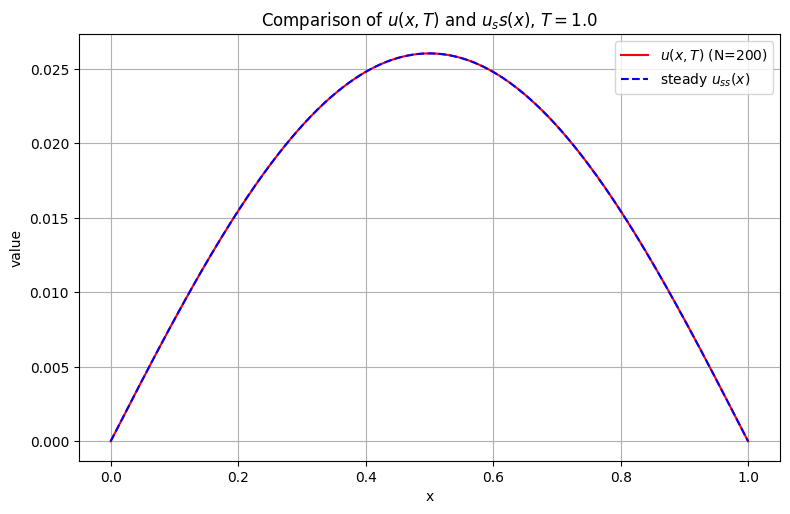

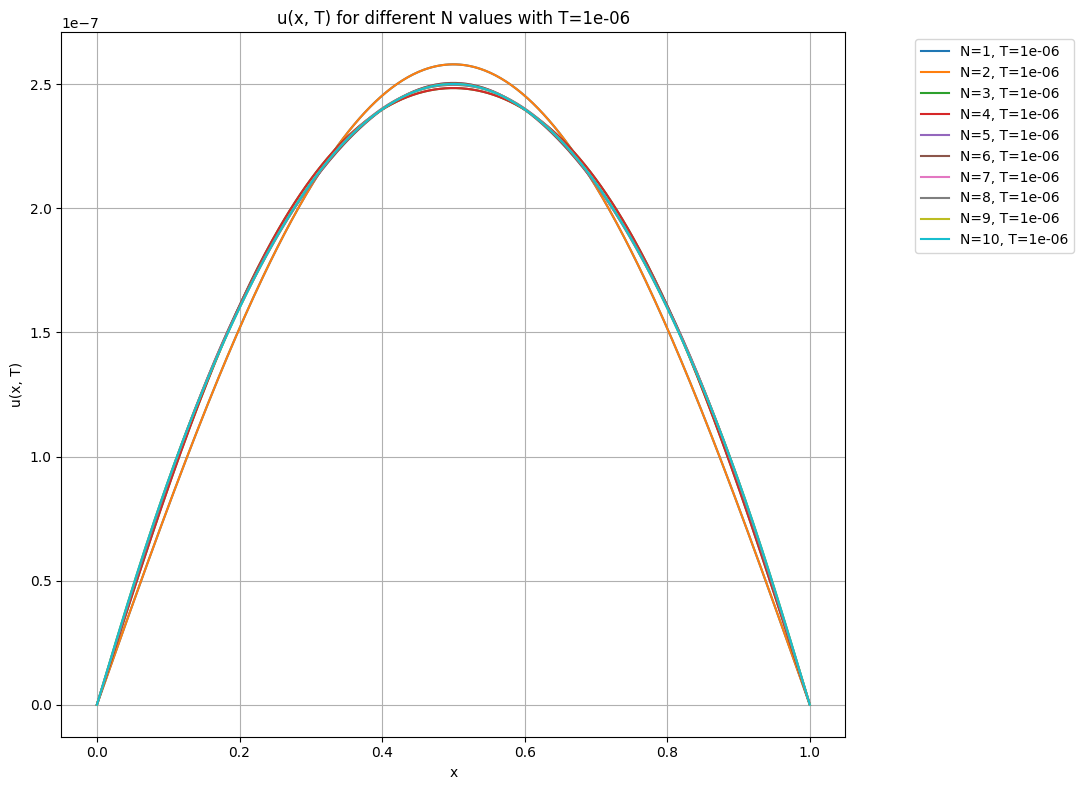

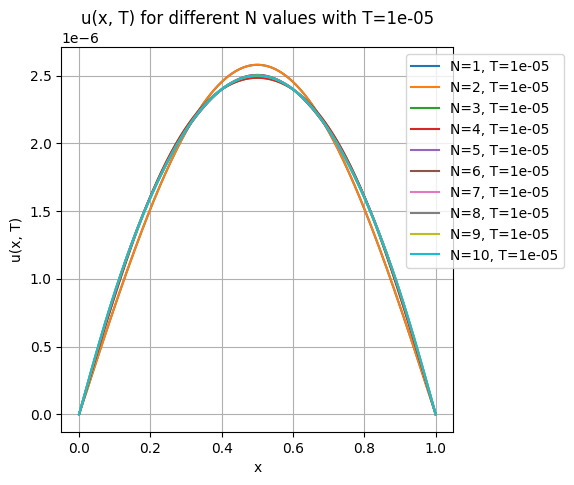

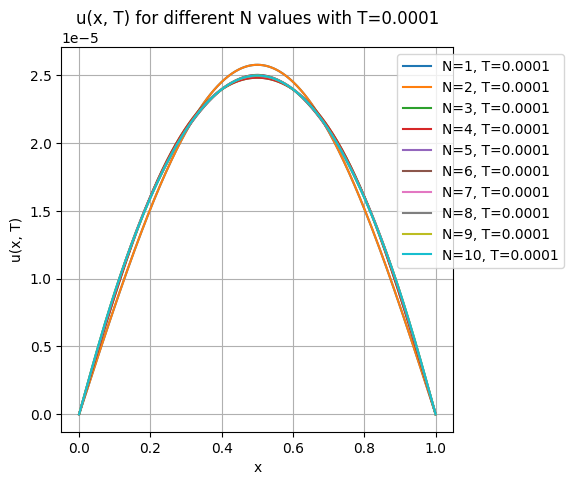

In [40]:
## I am going to verify that my maths is right by doing two things. Firstly, my u that is obtained as a combination of "lots" u_n terms should in the long term converge 
# to the f(x) function. So I will verify that. Secondly, I will verify that as I add more u_n terms, the error between f(x) and u(x) decreases. 
# I will do the first of these as a sense check in itself, and for the second one I will plot u(x) for multiple values of N over different time horizons.

# So to do this, I need 2 functions. I need f(x) and u(x,t) as a function of N, x and t.

ff = lambda x: x * (1-x)  # This is the function f(x) = x(1-x)
u_ss = lambda x: -x**3 / 6 + x**4 / 12 + x / 12
phi = lambda x, n: np.sin(n * np.pi * x)

def uu(x, t, N):
    sum_terms = 0
    for n in range(1, N + 1):
        u_n = 4 / (n**5 * np.pi**5) * (1 - (-1)**n) * (1 - np.exp(-n**2 * np.pi**2 * t))
        sum_terms += u_n * phi(x, n)
    return sum_terms



x_grid = np.linspace(0, 1, 400)
T, N = 1e-0, 200 
u_numeric = uu(x_grid, T, N)

plt.figure(figsize=(8,5))
plt.plot(x_grid, u_numeric, 'r', label=r'$u(x,T)$ (N=200)')
plt.plot(x_grid, u_ss(x_grid), 'b--', label='steady $u_{ss}(x)$')
plt.legend(); plt.xlabel('x'); plt.ylabel('value'); plt.tight_layout()
plt.title(rf'Comparison of $u(x,T)$ and $u_ss(x)$, $T={T}$')
plt.grid()
plt.show()

# Ok those line up perfectly, that's good. Now I will plot u(x) for different values of N over a range of T values to see how the error decreases as N increases.

T_values = [1e-6, 1e-5, 1e-4]
N_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 8))
for T in T_values:
    for N in N_values:
        u_numeric = uu(x_grid, T, N)
        plt.plot(x_grid, u_numeric, label=f'N={N}, T={T}')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('u(x, T)')
    plt.title(f'u(x, T) for different N values with T={T}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

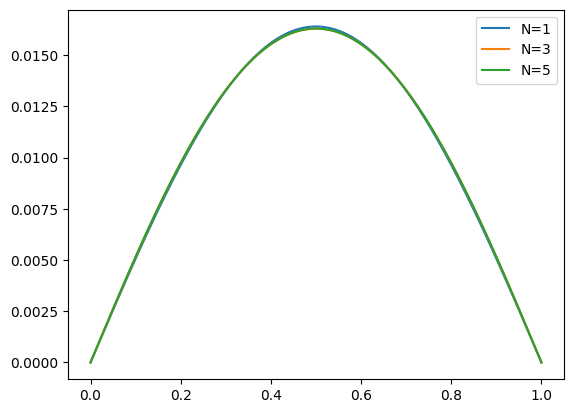

In [45]:
x_grid = np.linspace(0, 1, 400)
u_numeric = uu(x_grid, 0.1, 1)
plt.plot(x_grid, u_numeric, label='N=1')
plt.plot(x_grid, uu(x_grid, 0.1, 3), label='N=3')
plt.plot(x_grid, uu(x_grid, 0.1, 5), label='N=5')
plt.legend()

Now we change $f(x, t) = \xi(x, t)$.

Same approach is justified, and $\xi$ is now treated as:

$$
u_t - u_xx = \xi(x,t)\\
\xi(x,t) = \sum_{n=1}^\infty \dot{B}_n(t) \phi_n(x) \text{Where $\dot{B}$ is the time derivative of Brownian motion. Note: Need to better expore why this treatment is justified. I had it and have since forgotten. Slow brain} \\
\sum(v_n(t) - w_n(t) - \dot{B}_n(t))\phi(x) = 0\\
\frac{du_n}{dt} + \lambda_n^2 u_n = \frac{dB_n}{dt} \\
du_n = \lambda_n^2 u_n dt + dB_n \text{This is the OU process Prof. Giles spoke about. Has a known solution. Normally distributed.}\\
u_n(t) = e^{-\lambda_n^2 t} \int_0^t e^{\lambda_n^2 s}dB_n(s)\\
u_n(t) \sim \mathcal{N}(0, \frac{1-e^{-2\lambda_n^2 t}}{2\lambda_n^2}) \quad \text{Note: as t $\to \infty$, converge to constant variance for all $n$}
$$


Now profssor Giles has suggested that I use the amplitude of Fourier modes as a QoI. What does this mean? We calculate:

$$
u_n(t) = \langle u(t), \phi_n(x) \rangle = 2 \int_0^1 u(x,t) \sin(n \pi x) dx. \quad \text{We make this the quantity of interest, I think. Prof. Giles said amplitude, and this doesn't look quite like an amplitude though is all.} \\
\text{Amplitude is: } \sqrt{a_n^2 + b_n^2} = |b_n| \text{As sine series only}
$$

So my goal (check this with Professor Giles) is to use the MLMC method to to approximate $u_n(t) = 2 \int_0^1 u(x,t) \sin(n \pi x) dx$. I can use the forward difference scheme to obtain approximations for $u(x,t)$, and take the integral of that approximate integral of that quantity with $\sin(n \pi x)$ for different $n$, and that is my QoI. To benchmark, I know that this should be approximately normally distributed and how its variance should vary. I can use a statistical test to examine how close to normally distirbuted it is.  

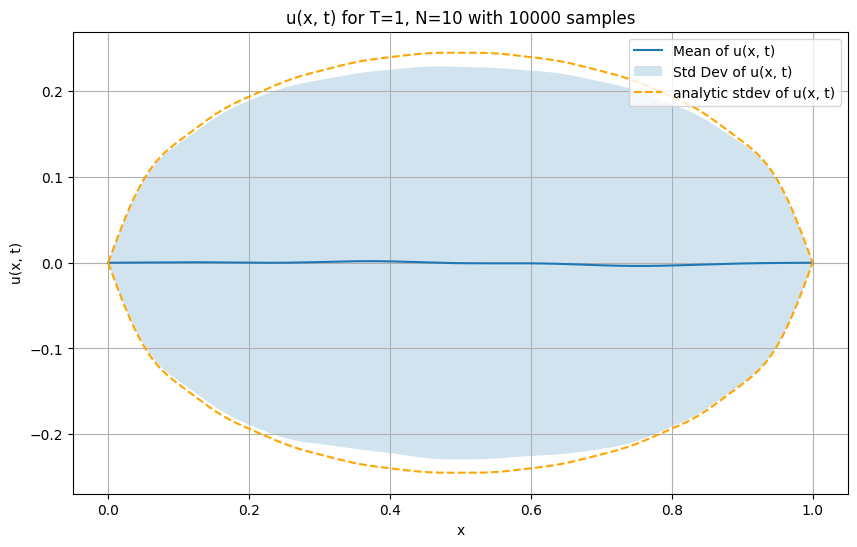

In [56]:
# Those also seem to work. That's good, I think my approach is correct. Now let's move onto considering what happens when f(x, t) is xi(x, t), i.e. white noise.
# Goal again from Prof Giles: This makes it a good testcase because if we take the output QoI (quantity of interest) to be the amplitude of a particular Fourier mode then we know 
# it is Normally distributed with a known amplitude, and you can check your numerics reproduces that.


# So Professor Giles suggests that I use MLMC and MC to verify that the integral of u(x, t) * sin(n pi x) converges to a normall distributed variable with mean 0 and 
# variance (1 - e^(-2 * n^2 pi^2 t)) / (2 * n^2 * pi^2) as n increases.

# Let's first verify that my u(x, t) is correct by plotting the first few Fourier modes of u(x, t) for a given t and looking at what the variance of these converge to.

u_n = lambda n, t: np.random.normal() * np.sqrt((1 - np.exp(-2 * n**2 * np.pi**2 * t)) / (2 * n**2 * np.pi**2))

def var_u(N, t, x):
    sum_terms = 0
    for n in range(1, N + 1):
        lam = n**2 * np.pi**2
        term = np.sin(n * np.pi * x)**2 * (1 - np.exp(-2 * lam * t)) / (2 * lam)
        sum_terms += term
    return sum_terms

def uu(x, t, N):
    sum_terms = 0
    for n in range(1, N + 1):
        sum_terms += u_n(n, t) * phi(x, n)
    return sum_terms

T, N = 1, 10
num_samples = 10000
x_grid = np.linspace(0, 1, 400)
u_samples = np.zeros((num_samples, len(x_grid)))
for i in range(num_samples):
    u_samples[i, :] = uu(x_grid, 0.1, 10)

var = var_u(N, T, x_grid)

plt.figure(figsize=(10, 6))
plt.plot(x_grid, u_samples.mean(axis=0), label='Mean of u(x, t)')
plt.fill_between(x_grid, u_samples.mean(axis=0) - u_samples.std(axis=0), 
                 u_samples.mean(axis=0) + u_samples.std(axis=0), alpha=0.2, label='Std Dev of u(x, t)')
plt.plot(x_grid, np.sqrt(var), label='analytic stdev of u(x, t)', linestyle='--', color='orange')
plt.plot(x_grid, -np.sqrt(var), linestyle='--', color='orange')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title(f'u(x, t) for T={T}, N={N} with {num_samples} samples')
plt.legend()
plt.grid()
plt.show()


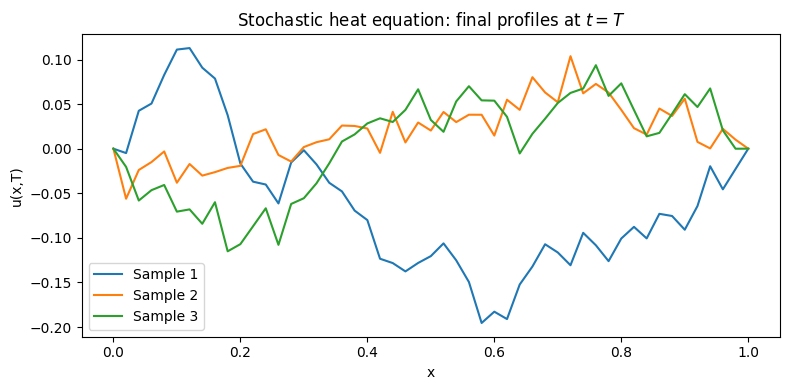

In [55]:
# I suppose all I did there was verify that my normally distributed random variables had the correct variance (i.e. that they're normally distributed).
# So our QoI should is going to be u_1. u_1 is the first Fourier mode, so it is the first term in the series expansion of u(x, t).
# u_n = 2 * integral from 0 to 1 (u(x, t) * sin(n pi x)) dx


# So steps, first construct an MC for estimating u(x,t) via a finite difference scheme, and we will see if that lines up with our QoI.

Nx = 51
dx = 1/(Nx - 1)
T = 0.2
dt = 1e-4
sigma = 0.2
nsamp = 3
plot_every = 20

nsteps = int(T/dt)
x = np.linspace(0.0, 1.0, Nx)
final_profiles = np.zeros((nsamp, Nx))
uhistory = np.zeros((nsteps // plot_every + 1, Nx))
uhistory.shape

for s in range(nsamp):
    u = np.zeros(Nx)
    save_idx = 0

    for n in range(nsteps):

        # finite-difference Laplacian
        lap = (np.roll(u, -1) -2.0 * u + np.roll(u, 1)) / dx**2
        lap[0] = lap[-1] = 0.0

        # additive space-time white noise increment
        dW = sigma * np.sqrt(dt/dx) * np.random.randn(Nx)
        dW[0] = dW[-1] = 0.0

        # Euler-Maruyama update
        u += dt * lap + dW

        if s == 0 and n % plot_every == 0:
            uhistory[save_idx] = u
            save_idx += 1

    final_profiles[s] = u

plt.figure(figsize=(8, 4))
for s in range(nsamp):
    plt.plot(x, final_profiles[s], label=f"Sample {s+1}")
plt.title("Stochastic heat equation: final profiles at $t=T$")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.legend()
plt.tight_layout()
plt.show()





Number of time steps: 640000, dt: 1.5625e-06, dx: 0.0025


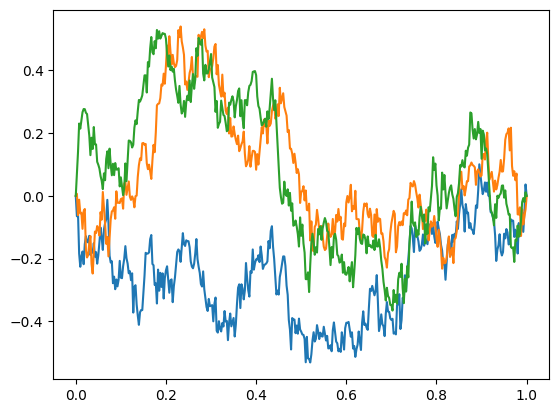

In [94]:
def u_scheme(T, nx, lam, n_samples=1000):
    """ 
    Uses a stochastic finite difference scheme to obtain n_samples of trajectories
    of the  stochastic heat equation.
    """
    dx = 1 / (nx - 1)
    dt = lam * dx**2
    nsteps = int(T / dt)
    print(f"Number of time steps: {nsteps}, dt: {dt}, dx: {dx}")
    u = np.zeros((n_samples, nx))
    x = np.linspace(0, 1, nx) # assumes uniform grid in [0, 1]
    i = np.arange(1, nx-1) # interior points
    std_dev = np.sqrt(dt / dx)
    for t in range(nsteps):
        if t % 1000 == 0:
            print(f"Time step {t}/{nsteps}")
        dW = np.random.randn(n_samples, nx - 2) * std_dev
        u[:, i] += lam * (u[:, i+1] - 2 * u[:, i] + u[:, i-1]) + dW
    return u

T = 1
lam = 0.25
nx = 401
u = u_scheme(T, nx, lam, n_samples=3)
# transpose as matplotlib treats each column as the thing to be plotted
# In my array each row is a sample u(x, T).


Update: I rebuilt a basic explicit-Euler finite difference scheme for the SHE. I've saved this now as in a python module which I will reuse and I can modify this as time goes on. It can generate $n$ samples of resulting paths for the SHE. This I will use either for obtaining estimates now of $\int_0^1 u(x,T) \sin(n \pi x) dx$ for different fourier modes and then I can verify that they are indeed normally distributed appropriately.

In [8]:
from utils.stochastic_heat_eqn import u_scheme
T = 1; lam = 0.25; nx = 64; n_samples = 1000
u_samples = u_scheme(T, nx, lam, n_samples)
var_un = lambda n, t: (1 - np.exp(-2 * n**2 * np.pi**2 * t)) / (n**2 * np.pi**2) # We remove the factor of 2 as I did not use an orthonormal basis in the Fourier decomposition.


Number of time steps: 16384, dt: 6.103515625e-05, dx: 0.015625
Time step 0/16384
Time step 1000/16384
Time step 2000/16384
Time step 3000/16384
Time step 4000/16384
Time step 5000/16384
Time step 6000/16384
Time step 7000/16384
Time step 8000/16384
Time step 9000/16384
Time step 10000/16384
Time step 11000/16384
Time step 12000/16384
Time step 13000/16384
Time step 14000/16384
Time step 15000/16384
Time step 16000/16384


/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_81237/640595095.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  fourier_modes[f"u_{n}"] = 2 * np.trapz(weighted_u, x=x_grid, axis=1)


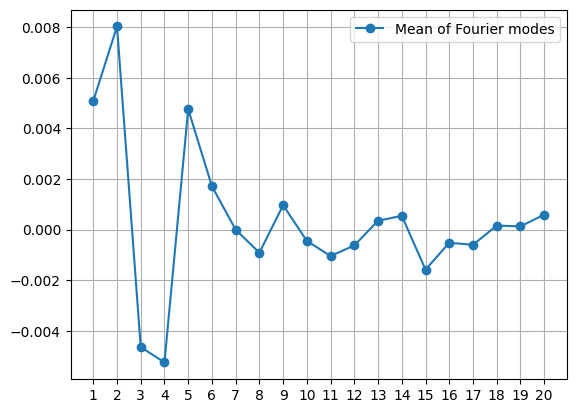

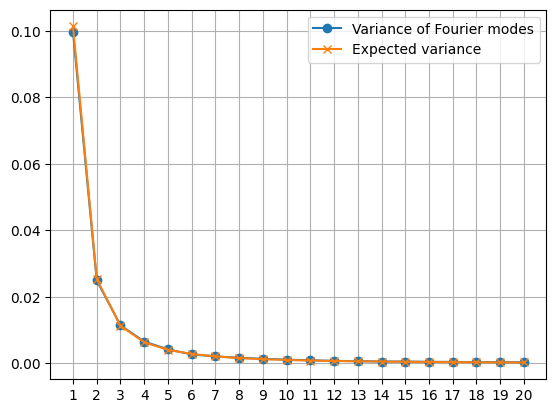

In [9]:
# Now we can compute the QoI, which is the first Fourier mode of u(x, T).
# u_n(T) = 2 * integral from 0 to 1 (u(x, T) * sin(n pi x)) dx
fourier_modes = {}
x_grid = np.linspace(0, 1, nx+1)
n_range = np.arange(1, 21)
for n in n_range:
    sin_n = np.sin(n * np.pi * x_grid)
    weighted_u = u_samples * sin_n # this is elementwise multiplication for each sample
    fourier_modes[f"u_{n}"] = 2 * np.trapz(weighted_u, x=x_grid, axis=1)

# Now we can now calculate the mean and variance of the Fourier modes.
mean_fourier_modes = {key: np.mean(value) for key, value in fourier_modes.items()}
var_fourier_modes = {key: np.var(value) for key, value in fourier_modes.items()}
expected_var = {f"u_{n}": var_un(n, T) for n in n_range}

plt.plot(n_range, mean_fourier_modes.values(), marker='o', label='Mean of Fourier modes')
plt.xticks(n_range)
plt.grid()
plt.legend()
plt.show()

plt.plot(n_range, var_fourier_modes.values(), marker='o', label='Variance of Fourier modes')
plt.plot(n_range, expected_var.values(), marker='x', label='Expected variance')
plt.xticks(n_range)
plt.grid()
plt.legend()
plt.show()


2 0
Number of time steps: 16, dt: 0.0625, dx: 0.5
Time step 0/16
3 1
Number of time steps: 36, dt: 0.027777777777777776, dx: 0.3333333333333333
Time step 0/36
4 2
Number of time steps: 64, dt: 0.015625, dx: 0.25
Time step 0/64
5 3
Number of time steps: 99, dt: 0.010000000000000002, dx: 0.2
Time step 0/99
6 4
Number of time steps: 144, dt: 0.006944444444444444, dx: 0.16666666666666666
Time step 0/144
7 5
Number of time steps: 196, dt: 0.00510204081632653, dx: 0.14285714285714285
Time step 0/196
8 6
Number of time steps: 256, dt: 0.00390625, dx: 0.125
Time step 0/256
9 7
Number of time steps: 324, dt: 0.0030864197530864196, dx: 0.1111111111111111
Time step 0/324
10 8
Number of time steps: 399, dt: 0.0025000000000000005, dx: 0.1
Time step 0/399
11 9
Number of time steps: 484, dt: 0.002066115702479339, dx: 0.09090909090909091
Time step 0/484
12 10
Number of time steps: 576, dt: 0.001736111111111111, dx: 0.08333333333333333
Time step 0/576
13 11
Number of time steps: 675, dt: 0.001479289940

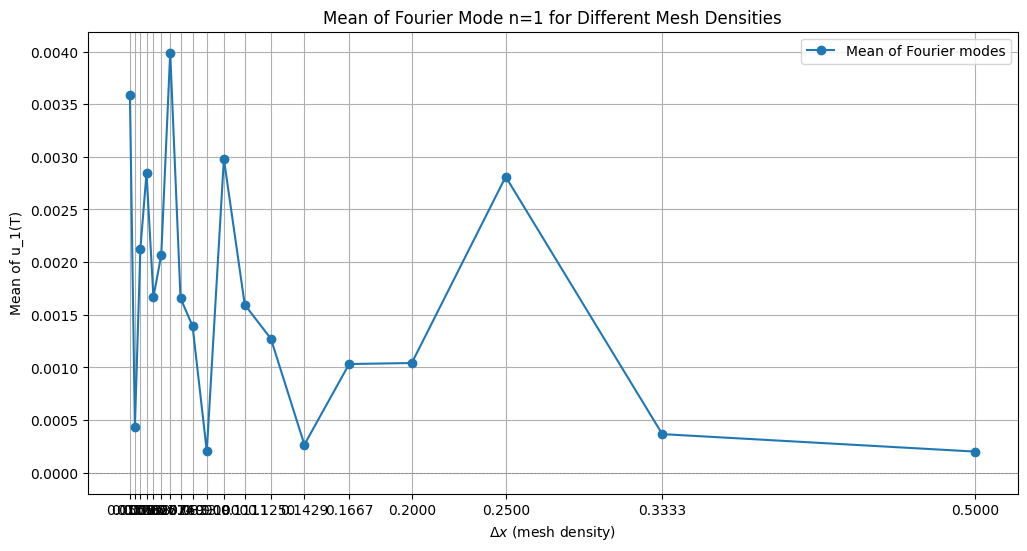

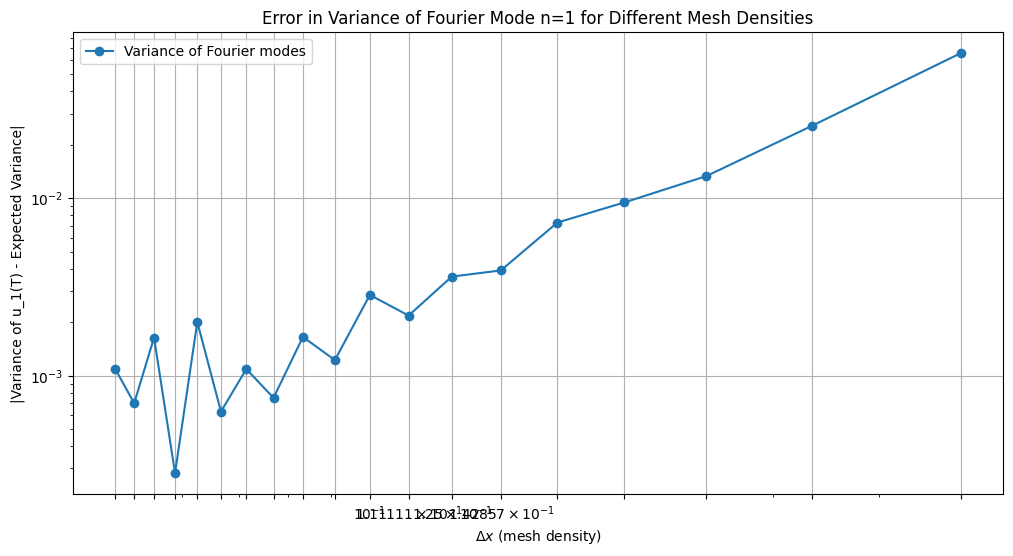

In [18]:
# Quick investigation  - see how convergence varies for this MC implementation with different
# mesh densities.
np.random.seed(seed=11)
T = 1; lam = 0.25; n_samples = 30000; n = 1
num_segments = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
delta_x = [1 / nx  for nx in num_segments]  # Calculate delta_x for each mesh density
expected_var = var_un(n, T)
u_samples = {}
fourier_modes = {}

for i, nx in enumerate(num_segments):
    u_samples[nx] = u_scheme(T, nx, lam, n_samples)
    x_grid = np.linspace(0, 1, nx + 1)  # Update x_grid for each mesh density
    sin_n = np.sin(n * np.pi * x_grid)
    weighted_u = u_samples[nx] * sin_n  # Elementwise multiplication for each sample
    fourier_modes[nx] = 2 * delta_x[i] * np.sum(weighted_u, axis = 1)
    # fourier_modes[nx] = 2 * np.trapz(weighted_u, x=x_grid, axis=1)  # Integrate along the x dimension
# Now we can plot the mean and variance of the Fourier modes for each mesh density against expected values.
mean_fourier_modes = {nx: np.mean(fourier_modes[nx]) for nx in num_segments}
var_fourier_modes = {nx: np.var(fourier_modes[nx]) for nx in num_segments}
plt.figure(figsize=(12, 6))
plt.plot(delta_x, [abs(mean_val) for mean_val in mean_fourier_modes.values()], marker='o', label='Mean of Fourier modes')
plt.xticks(delta_x)
plt.xlabel(r'$\Delta x$ (mesh density)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.ylabel('Mean of u_1(T)')
plt.title('Mean of Fourier Mode n=1 for Different Mesh Densities')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.loglog(delta_x, [abs(val - expected_var) for val in var_fourier_modes.values()], marker='o', label='Variance of Fourier modes')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xticks(delta_x)
plt.xlabel(r'$\Delta x$ (mesh density)')
plt.ylabel('|Variance of u_1(T) - Expected Variance|')
plt.title('Error in Variance of Fourier Mode n=1 for Different Mesh Densities')
plt.grid()
plt.legend()
plt.show()

In [19]:
log_dx = np.log(delta_x)
var_error = [abs(val - expected_var) for val in var_fourier_modes.values()]
log_var_error = np.log(var_error)
slope, intercept = np.polyfit(log_dx, log_var_error, 1)
print(f"Estimated convergence rate: error ~ delta x^{slope:.2f}")


Estimated convergence rate: error ~ delta x^1.97


In [18]:
# Ok QoI investigated. Next goal: 
# Modify the MLMC code such that it can return the QoI. Let's verify this works 
# using MC methodlogy and the 
# 1 - Check the MLMC implementation for this works. I need it to return my sample QoI
# But first get the MC implementation working.
# 

from mlmc.stoch_heat_eqn_qoi import stoch_heat_eqn_l
from mlmc.mlmc import mlmc
import numpy as np
from functools import partial

def fourier_mode(n, u):
    """
    Computes the Fourier mode u_n(T) = 2 * integral from 0 to 1 (u(x, T) * sin(n pi x)) dx
    for a given n and u(x, T).
    """
    x_grid = np.linspace(0, 1, u.shape[0])
    sin_n = np.sin(n * np.pi * x_grid)[:, None]
    weighted_u = u * sin_n  # Elementwise multiplication for each sample
    return 2 * np.trapz(weighted_u, x=x_grid, axis=0) # Integrate along the x dimension

l = 3; N = 10000; u_1 = partial(fourier_mode, 1)
var_un = lambda n, t: (1 - np.exp(-2 * n**2 * np.pi**2 * t)) / (n**2 * np.pi**2) # We remove the factor of 2 as I did not use an orthonormal basis in the Fourier decomposition.

sum1, sum2 = stoch_heat_eqn_l(l, N, qoi_fn=u_1)


print(f"MC expectation of sample: {sum2[0] / N}")
print(f"MC variance of sample: {sum2[1] / N - (sum2[0] / N)**2}")
print(f"Expected variance of u_1(T): {var_un(1, 0.25)}")

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_77821/3535529188.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2 * np.trapz(weighted_u, x=x_grid, axis=0) # Integrate along the x dimension


MC expectation of sample: 0.00031224529799227685
MC variance of sample: 0.1032382992636863
Expected variance of u_1(T): 0.10059249350810782


In [44]:
# Ok so the MC implementation works. Now let's try the MLMC implementation.
# Want to verify it converges in variance and mean to the correct values.
# To verify this, make the QoI be g(u) and g(u)^2.
# I can then have the MLMC calculate the E[g(u)] and E[g(u)^2], with which I can verify 
# that the variance is correct too.

from mlmc.mlmc import mlmc

N = 10000; l = 3
var_un = lambda n, t: (1 - np.exp(-2 * n**2 * np.pi**2 * t)) / (n**2 * np.pi**2)

u_1 = partial(fourier_mode, 1)
u_1_sq = lambda u: u_1(u)**2

sum1, sum2 = stoch_heat_eqn_l(l, N, qoi_fn=u_1_sq)

print(f"MC expectation of sample u_1_sq: {sum2[0] / N}")
print(f"Expectation of sample: {var_un(1, 0.25)} ")

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_77821/3535529188.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2 * np.trapz(weighted_u, x=x_grid, axis=0) # Integrate along the x dimension


MC expectation of sample u_1_sq: 0.10257188646914524
Expectation of sample: 0.10059249350810782 


In [2]:
# Ok so this works
# Next, let's ensure the MLMC implementation working. FIrst, just a sense check that the original MLMC is working
from mlmc.para import para
from mlmc.gbm_euler import gbm_euler
from mlmc.stoch_heat_eqn import stoch_heat_eqn, stoch_heat_eqn_l
from utils.stochastic_heat_eqn import u_scheme
import numpy as np

np.random.seed(seed=42)

# gbm_euler() # This works, gave correct numbers. Confident mlmc and test_mlmc modules are correct.
# para () # This works, gave correct numbers. Confident mlmc and test_mlmc modules are correct
 # This should generate the original plots, and we should get alpha=2, beta=4.
# Ok that works. Next I want to compare mc and MLMC estimates of QoI That's my goal

# First verify that the stoch_heat_eqn equation works.
T = 0.25; nx = 50; lam = 0.25
u_samples = u_scheme(T, nx, lam, n_samples=5000)
h = 1 / nx
u_sq = h * np.sum(u_samples**2, axis=1)
print(np.mean(u_sq)) # 0.08527441178994156

# Now compare this to my MLMC quantities given.
N = 10000; l = 4
sum1, sum2 = stoch_heat_eqn_l(l, N)
print(sum2[0] / N, np.mean(u_sq))

Number of time steps: 2500, dt: 0.0001, dx: 0.02
Time step 0/2500
Time step 1000/2500
Time step 2000/2500
0.08527441178994156
0.08629451710935172 0.08527441178994156
